<a href="https://colab.research.google.com/github/Jaizxzx/Neural-Network_and_Deep-Learning/blob/main/PyTorch/Practice/Computer_vision_exercise%5BFashion_MNIST%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [42]:
# Check for GPU
!nvidia-smi

Mon Jul 29 08:01:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [43]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'


2.3.1+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

Three main areas where computer vision is used are :
1. Medical Imaging - To scan the mri images and detect or alert for the possibility of diseases
2. Autonomous Vehicles - Extensively used in autonomus vehicles like Tesla's Autopilot
3. Robotics - Works as there eyes and helps them to navigate the environment and perform certain actions based on the inpu t received from the environment.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

**Overfitting is when our model tries to memorize the test dataset and doesn't
generalize well to new data and in this case it mostly performs very well on
the train dataset but performs very poor on the test dataset.**

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. By adding dropout layer so that the network is trained on different feature
and it generalises for all of the cases rather than remembering the train cases.

2. Increasing the training dataset size so that the model can get more general
patterns rather than learning the few and remembering them.

3. Data Augmentation by applying transormations to the given dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Uploaded my own render from the current Unreal Engine Cinematic project
conataining Ferrari SF 90 Stradale and the model Tiny VGG predicted it correctly
to be a sports car with a 57.64% surity.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [44]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

data_test = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
data_train = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Ankle boot


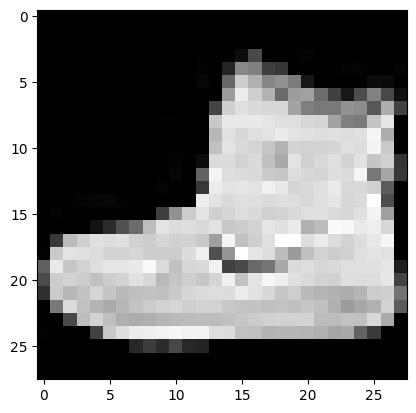

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names[data_train[0][1]])
plt.imshow(data_train[0][0].squeeze(), cmap='gray')
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [67]:
data_train_loader = DataLoader(data_train, batch_size=32)
data_test_loader = DataLoader(data_test, batch_size=32)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [74]:
from torch import nn
class Fashion_MNIST_Model(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=input_shape,
                               out_channels=hidden_units,
                               kernel_size=3,
                               stride=1,
                               padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=hidden_units,
                               out_channels=hidden_units * 2,
                               kernel_size=3,
                               stride=1,
                               padding=1)
        # Calculate the expected flattened size after convolutions and pooling
        self.flatten = nn.Flatten()
        # Assuming input size is 28x28, adjust if different
        expected_flattened_size = (hidden_units * 2) * (28 // 2) * (28 // 2)
        self.classifier = nn.Sequential(
            nn.Linear(in_features=expected_flattened_size, out_features=output_shape)
        )

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = self.flatten(x) # Flatten the output before passing to the linear layer
        x = self.classifier(x)
        return x

In [75]:
model = Fashion_MNIST_Model(input_shape=1, hidden_units=10, output_shape=10).to(device)
model

Fashion_MNIST_Model(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Linear(in_features=3920, out_features=10, bias=True)
  )
)

In [76]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-0.2907, -0.1775, -0.2597],
                        [-0.3252,  0.1220,  0.1300],
                        [-0.1623,  0.3313,  0.2797]]],
              
              
                      [[[-0.1307, -0.2649,  0.2827],
                        [ 0.1462, -0.0815,  0.1231],
                        [-0.2151, -0.1206, -0.1722]]],
              
              
                      [[[ 0.2081,  0.2194,  0.1471],
                        [-0.0880, -0.2815,  0.2579],
                        [-0.2904, -0.3234, -0.2400]]],
              
              
                      [[[-0.2655,  0.0977, -0.2130],
                        [-0.1304,  0.0178,  0.2097],
                        [ 0.2261, -0.0774, -0.1384]]],
              
              
                      [[[-0.2551,  0.1114, -0.0469],
                        [ 0.3260,  0.0095, -0.1347],
                        [ 0.2066, -0.2183,  0.2174]]],
              
              
               

In [77]:
device

'cuda'

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [78]:
from tqdm.auto import tqdm

model_gpu = Fashion_MNIST_Model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(data_train_loader):
    model_gpu.train()

    # Put data on CPU
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(data_train_loader)

  ### Testing loop
  test_loss_total = 0

  # Put model in eval mode
  model_gpu.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(data_test_loader):
      # Make sure test data on CPU
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(data_test_loader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.451 | Test loss: 0.364
Epoch: 1 | Loss: 0.301 | Test loss: 0.309
Epoch: 2 | Loss: 0.262 | Test loss: 0.285
Epoch: 3 | Loss: 0.238 | Test loss: 0.301
Epoch: 4 | Loss: 0.221 | Test loss: 0.299


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

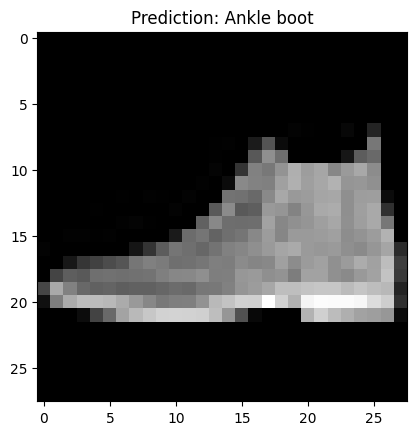

In [82]:
plt.imshow(data_test[0][0].squeeze(), cmap="gray")
plt.title(f"Prediction: {class_names[torch.argmax(torch.softmax(model_gpu(data_test[0][0].unsqueeze(dim=0).to(device)), dim=1))]}")
plt.show()

In [84]:
model_pred_logits = model_gpu(data_test[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([9], device='cuda:0')

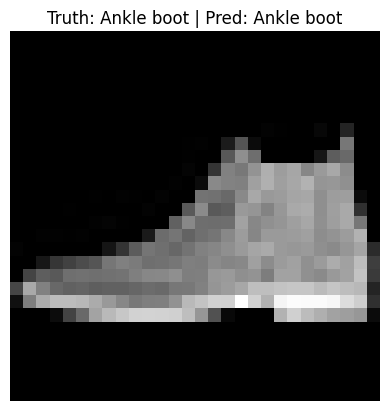

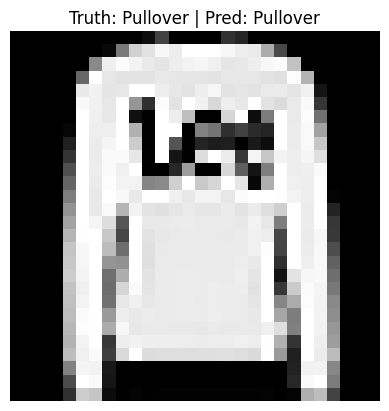

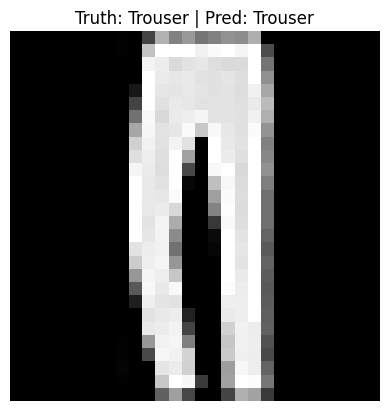

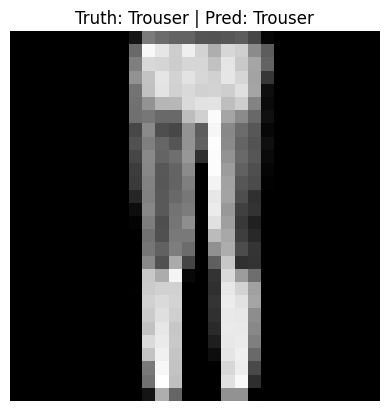

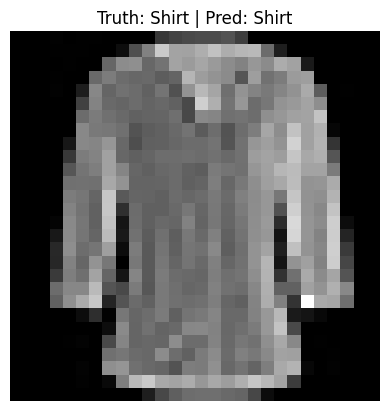

In [90]:
num_to_plot = 5
for i in range(num_to_plot):
  img = data_test[i][0]
  label = data_test[i][1]

  model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {class_names[label]} | Pred: {class_names[model_pred_label.cpu().item()]}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [91]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 15.2 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [92]:
import mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [94]:
from tqdm.auto import tqdm
model_gpu.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(data_test_loader)):
    X, y = X.to(device), y.to(device)
    y_pred_logits = model_gpu(X)
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
len(y_preds)

0it [00:00, ?it/s]

10000

In [95]:
data_test.targets[:10], y_preds[:10]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

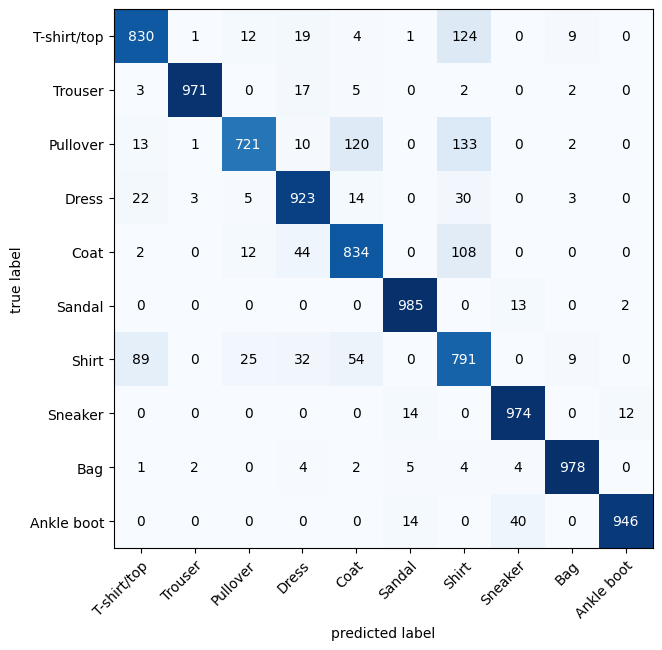

In [96]:

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setting up confusion matrix
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds,
                         target=data_test.targets)

# Confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [97]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [100]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=32,
                       kernel_size=3,
                       stride=4,
                       padding=0)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 32, 16, 16])
